In [ ]:
Project 2

In [105]:
!pip install numpy pandas matplotlib seaborn
!pip install scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [106]:
neo_df_raw = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [107]:
# Introduction
# Following my previous work with Near Earth Objects, we can delve a bit deeper into our data. We can begin to ask questions such as:
# Based off of our criteria, like velocity, diameter, and miss distance, can we predict future objects as hazardous or non hazardous to any 
# real degree of accuracy?

# Data:
# This data can be found on kaggle, and originates from NASA. It includes data about Near Earth Objects discovered by NASA from 1910 to 2024. It 
# contains columns for data such as name, diameter, velocity, miss distance, luminosity, and more. 
# https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024

In [108]:
# neo_df_raw.head()

In [109]:
neo_df_raw.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [110]:
neo_df_raw.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [111]:
# Preprocessing: We're going to drop our null values here because we have so many entries, and I'd rather work with complete data so as to not skew our
# results, as well as keep our predicitons a bit more faithful.
# In an effort to figure out the random forest model, so far I've dropped the columns for the neo_id as well as the name column. I am
# also considering extracting the values for the years like I did in my first project to see if recency can play any role in 
# predicting whether an object is hazardous or nonhazardous.
neo_df = neo_df_raw.dropna()
data = {
    'estimated_diameter_min': neo_df['estimated_diameter_min'],
    'estimated_diameter_max': neo_df['estimated_diameter_max'],
    'relative_velocity': neo_df['relative_velocity'],
    'miss_distance': neo_df['miss_distance'],
    'absolute_magnitude': neo_df['absolute_magnitude'],
    'is_hazardous': neo_df['is_hazardous']
}
neo_df_cleaned = pd.DataFrame(data)

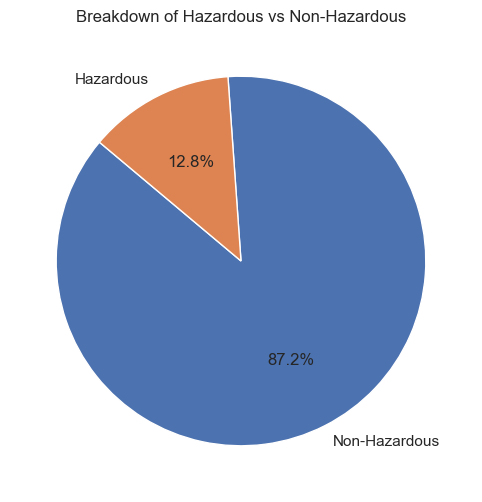

In [112]:
# Visualizations: Here we have a pie chart showing the breakdown of hazardous and non-hazardous object in our dataset
hazardous_counts = neo_df['is_hazardous'].value_counts()
labels = {True: 'Hazardous', False: 'Non-Hazardous'}
mapped_labels = [labels[bool(label)] for label in hazardous_counts.index]
plt.figure(figsize =(8,6))
plt.pie(hazardous_counts, labels=mapped_labels, autopct='%1.1f%%', startangle=140)
plt.title('Breakdown of Hazardous vs Non-Hazardous')
plt.show()

<Axes: xlabel='estimated_diameter_min', ylabel='relative_velocity'>

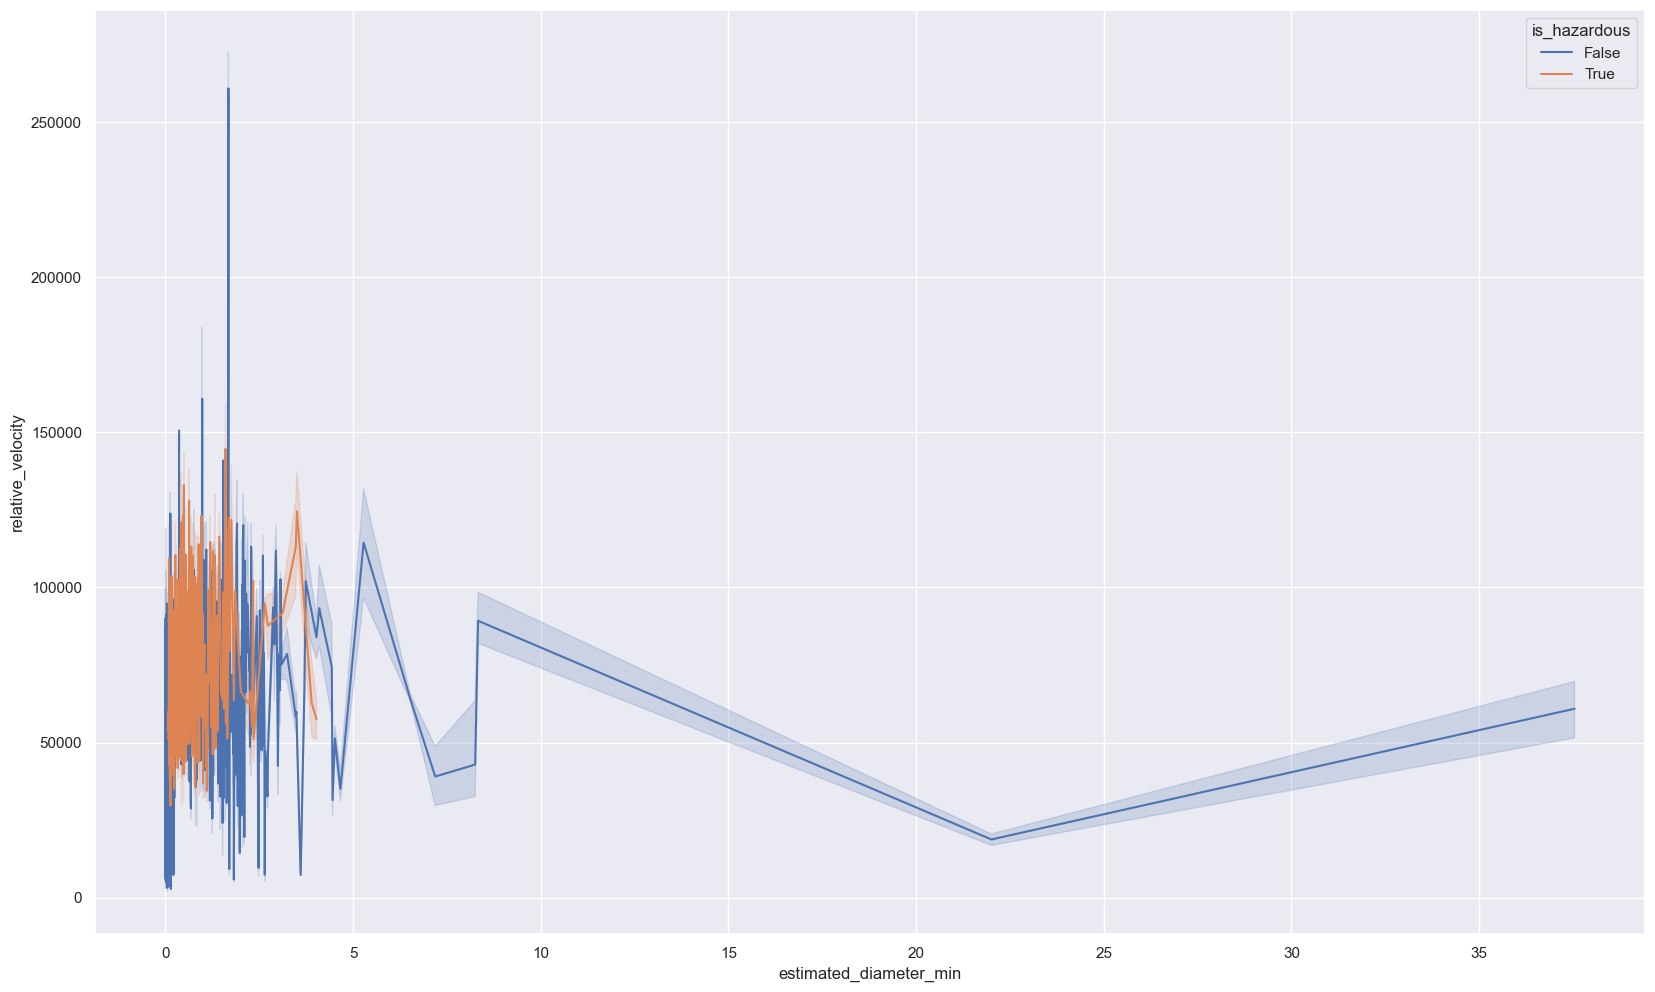

In [113]:
# Visualization 2: This graph shows us a comparison between the estimated min diameter and relative velocity and coupled with the next graph, can show
# us where the hazardous and non-hazardous objects stack up in comparison with relative velocity.

sns.set(rc={"figure.figsize":(20,12)})
sns.lineplot(data=neo_df, x='estimated_diameter_min', y='relative_velocity', hue='is_hazardous')


<Axes: xlabel='estimated_diameter_max', ylabel='relative_velocity'>

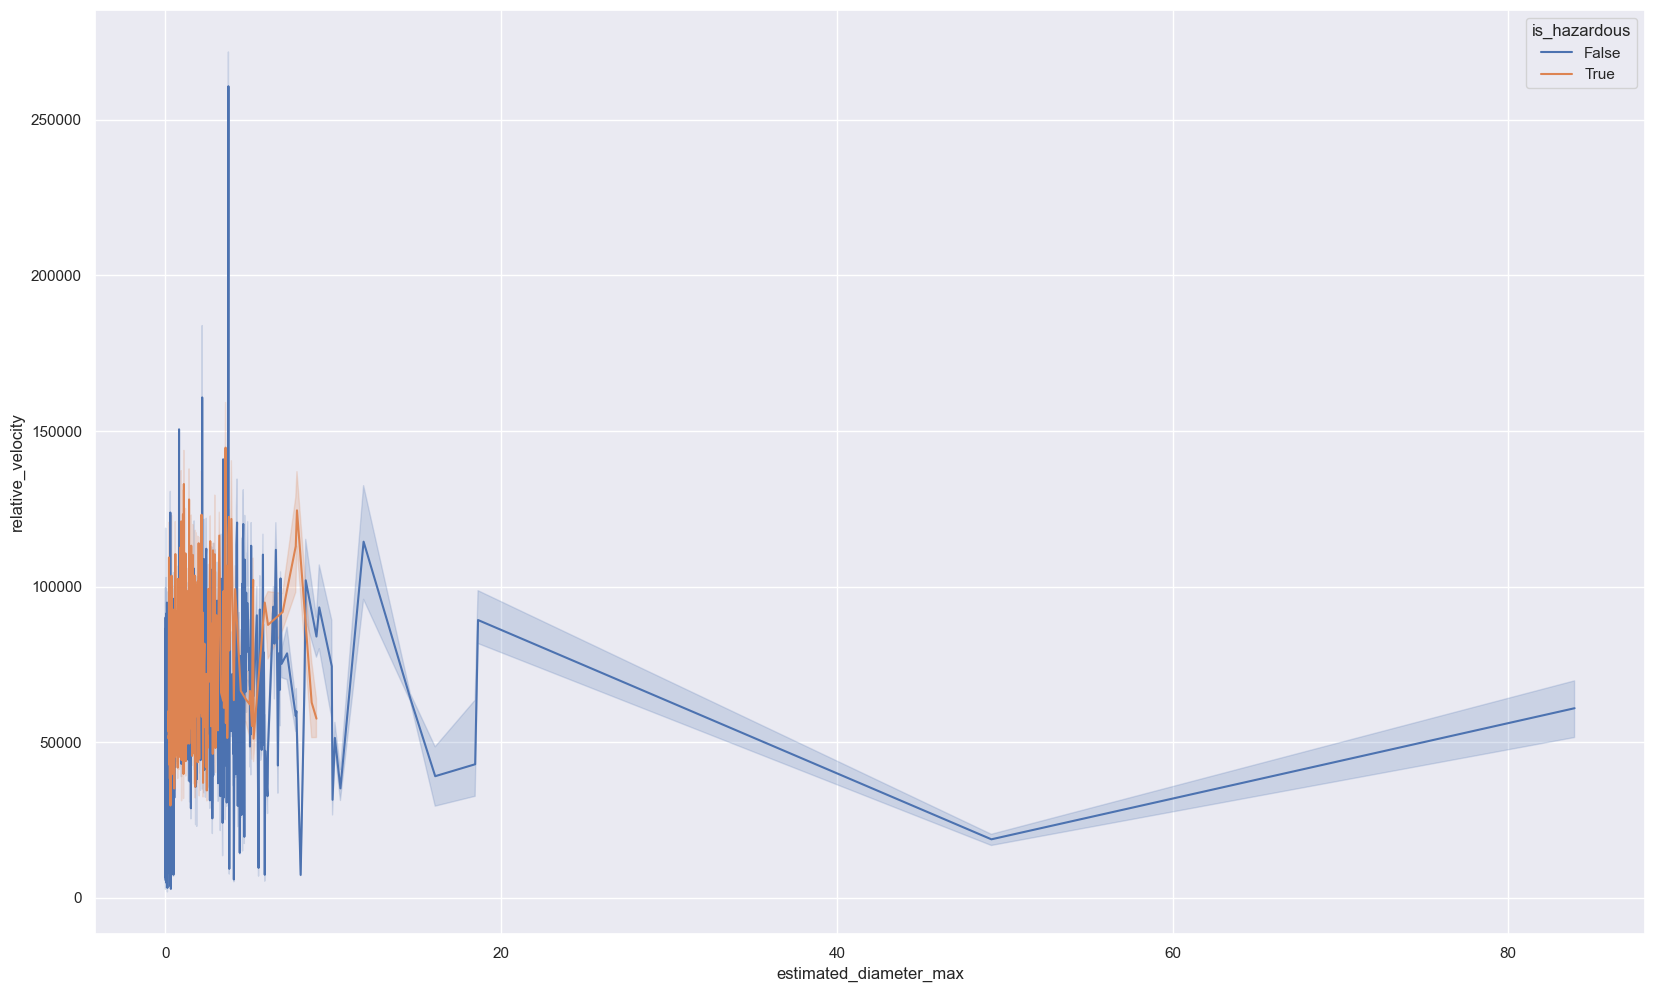

In [114]:
# Visualization 3: This graph is coupled with the previous graph to show us where our hazardous objects stack up against the relative velocity
sns.set(rc={"figure.figsize":(20,12)})
sns.lineplot(data=neo_df, x='estimated_diameter_max', y='relative_velocity', hue='is_hazardous')

In [115]:
# Modelling: We're going to try out a binary forest for our data set. I'm choosing this one because not only is it a simple concept to 
# bring to life and understand, but we should also get more reliable and accurate predictions from a binary forest than we would just one tree. 
# I also think that since all of my values are categorical, this model might be a bit more accurate.
# I know that SVM is likely to not be a good model choice due to the significant overlap within the points of the data set.



In [116]:
X = neo_df_cleaned.drop(columns = ['is_hazardous'])
y = neo_df_cleaned['is_hazardous']

In [117]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42) #80% train, 20% test

In [118]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (270536, 5)
X_test (67635, 5)
y_train (270536,)
y_test (67635,)


In [119]:
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier(n_estimators = 50, random_state=42)
randForest.fit(X_train, y_train)
y_predict = randForest.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, y_predict)
print("Precision: ", precision)


Accuracy:  0.9171730612848378
Precision:  0.712819771643301
